In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
df_train = pd.read_csv("train.csv")
titanic=df_train

In [63]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
print("TOTAL DE DATOS: ")
print(df_train.shape)

TOTAL DE DATOS: 
(891, 12)


In [65]:
pd.value_counts(titanic['Pclass'])

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [66]:
pd.value_counts(titanic['Sex'])

male      577
female    314
Name: Sex, dtype: int64

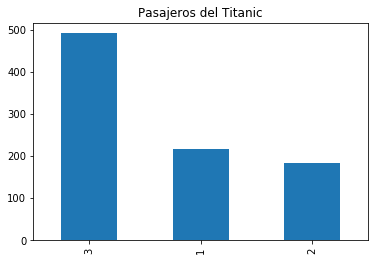

In [67]:
plot = titanic['Pclass'].value_counts().plot(kind='bar',
                                            title='Pasajeros del Titanic')

In [68]:
pd.crosstab(index=titanic['Survived'],
            columns=titanic['Pclass'], margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [69]:
pd.crosstab(index=titanic['Survived'], columns=titanic['Pclass'],
            margins=True).apply(lambda r: r/len(titanic) *100,
                                axis=1)

Pclass,1,2,3,All
Survived,,,,
0,8.978676,10.886644,41.750842,61.616162
1,15.263749,9.764310,13.355780,38.383838
All,24.242424,20.650954,55.106622,100.000000


In [70]:
pd.crosstab(index=titanic['Survived'], columns=titanic['Pclass']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Pclass,1,2,3
Survived,,,
0,14.571949,17.668488,67.759563
1,39.766082,25.438596,34.795322


In [71]:
pd.crosstab(index=titanic['Survived'], columns=titanic['Pclass']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


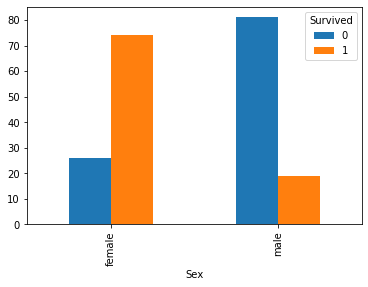

In [72]:
plot = pd.crosstab(index=titanic['Sex'],
            columns=titanic['Survived']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

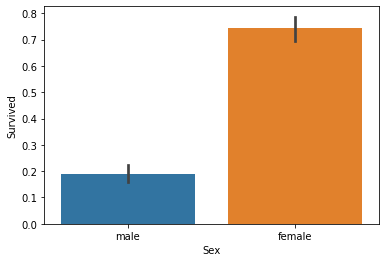

In [73]:
sns.barplot(x="Sex", y="Survived", data=titanic)

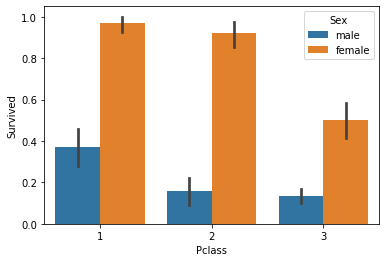

In [74]:
sns.barplot(x="Pclass", y="Survived", hue="Sex",data=titanic)

In [75]:
pd.crosstab(index=titanic['Sex'], columns=titanic['Pclass']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Pclass,1,2,3
Sex,,,
female,29.936306,24.203822,45.859873
male,21.143847,18.717504,60.138648


In [76]:
tabla_cross = pd.crosstab([titanic.Survived],[titanic.Sex])*100
tabla_cross

Sex,female,male
Survived,,
0,8100,46800
1,23300,10900


In [77]:
tabla_cross2 = pd.crosstab([titanic.Survived, titanic.Pclass],[titanic.Sex])
tabla_cross2

Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47

In [78]:
#Según la tabla, la mayor cantidad de sobrevivientes corresponde a mujeres que viajaron en primera clase y la mayor cantidad de fallecidos fueron hombres que viajaron en tercera clase.

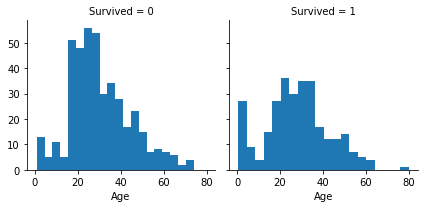

In [79]:
histograma_edad = sns.FacetGrid(titanic, col='Survived')
histograma_edad.map(plt.hist, 'Age', bins=20)

In [80]:
#De la gráfica se desprende que los sobrevivientes son mayormente niños y adultos de entre los 20 y 40 años. 

In [81]:
#Si se analiza finalmente por edad y clase en la que se viajaba, se puede decir que para todas las edades la mayor cantidad de sobrevivientes son los que viajaban en primera clase.

In [82]:
#las primeras hipótesis de correlación entre las variables. Por ejemplo, la edad, sexo y clase en la que se viajó están relacionadas con la posibilidad de haber sobrevivido a la tragedia